In [2]:
import pandas as pd 
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats


import statsmodels.api as sm
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split


In [3]:
datapath = r'data.csv'
df = pd.read_csv(datapath)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

##### No missing values 

In [4]:
df.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


## Feature Engineering
#### Some of the variables or columns have the same name as seen in df.info and also on df.describe almost the same mean and std 

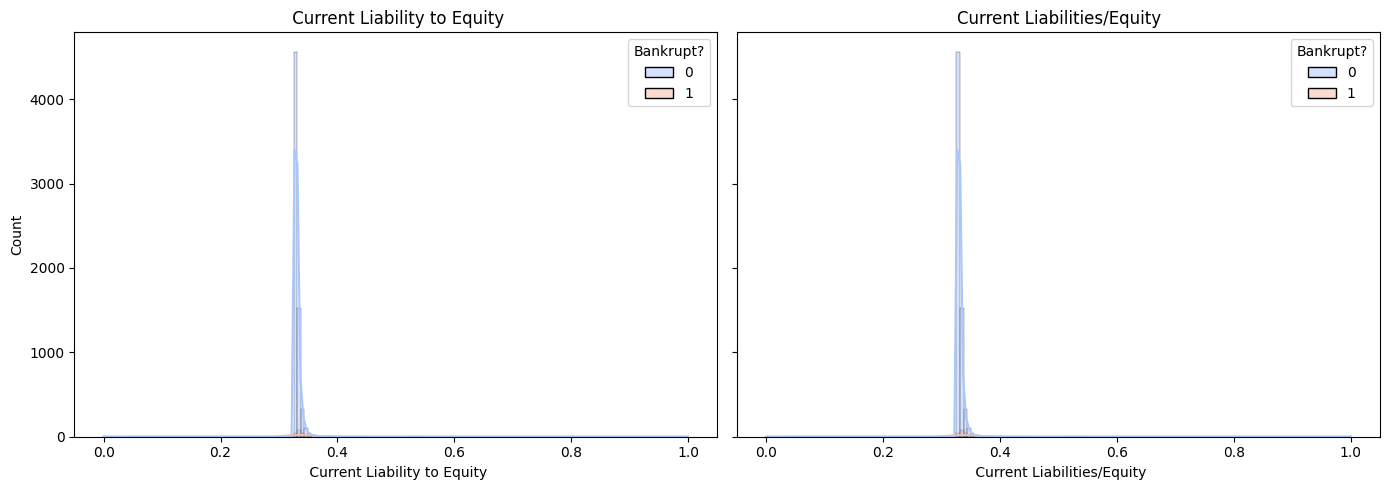

In [93]:
### Do a displot for Current Liability to Equity and Current Liabilites / Equity 
### they have the same distribution so one is a redutant column that we can remove 

#plots , you can a side by side for more plots 
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)
sns.histplot(data=df, x=' Current Liability to Equity', hue='Bankrupt?', kde=True, ax=axes[0], palette='coolwarm')
axes[0].set_title(' Current Liability to Equity')

sns.histplot(data=df, x=' Current Liabilities/Equity', hue='Bankrupt?', kde=True, ax=axes[1], palette='coolwarm')
axes[1].set_title('Current Liabilities/Equity')

plt.tight_layout()
plt.show()

In [4]:
#####Removing the net income flag because it has only a value of 1 and its not important in the analysis 
column_to_remove = df.columns[94]
df = df.drop(columns= column_to_remove , axis= 1)

### Use correlation to get the others that are more related to each other 

In [5]:
corr_matrix = df.corr()

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find pairs with absolute correlation greater than 0.8
high_corr_pairs = upper.unstack().sort_values(ascending=False).dropna()
high_corr_pairs = high_corr_pairs[high_corr_pairs.abs() >= 0.8]

print("\nHighly Correlated Pairs (>= 0.8):")
print(high_corr_pairs)


Highly Correlated Pairs (>= 0.8):
Current Liability to Equity                        Current Liabilities/Equity                                 1.000000
Current Liability to Liability                     Current Liabilities/Liability                              1.000000
Gross Profit to Sales                              Operating Gross Margin                                     1.000000
Net Value Per Share (C)                            Net Value Per Share (A)                                    0.999837
Realized Sales Gross Margin                        Operating Gross Margin                                     0.999518
Gross Profit to Sales                              Realized Sales Gross Margin                                0.999518
Net Value Per Share (A)                            Net Value Per Share (B)                                    0.999342
Net Value Per Share (C)                            Net Value Per Share (B)                                    0.999179
Operating pro

In [6]:
### Remove Spaces from the ends and beginning
df.columns = df.columns.str.strip()

In [7]:
### Since we are looking at Bankruptcy and this is long term not a short term ,
## The first drop will be Current Liabilities/Equity and Current Liability to Equity because Liability to Equity is correlated to bothat 96%
# Liability to Equity is long term so it more towards bankruptcy than current 

columns_to_drop = [
    'Current Liability to Equity',
    'Current Liabilities/Equity',
    'Gross Profit to Sales',
    'Operating Gross Margin',
    'Current Liability to Assets',
    'Debt ratio %',
    'Net Value Per Share (C)',
    'Net Value Per Share (B)',
    'Operating Profit Per Share (Yuan ¥)',
    'Pre-tax net Interest Rate',
    'ROA(A) before interest and % after tax',
    'ROA(C) before interest and depreciation before interest'
]

df = df.drop(columns=columns_to_drop, axis=1)
                                     

## PCA to reduce on multicollinearity and redudancy

##### So we have 86 columns after dropping  but we are dropping manually you can reduce on the redudancy of these variables and reduce multicolinearily by using PCA 

In [8]:
### get only the independent variables 
numerical_df  = df.drop(columns = 'Bankrupt?' , axis = 1)

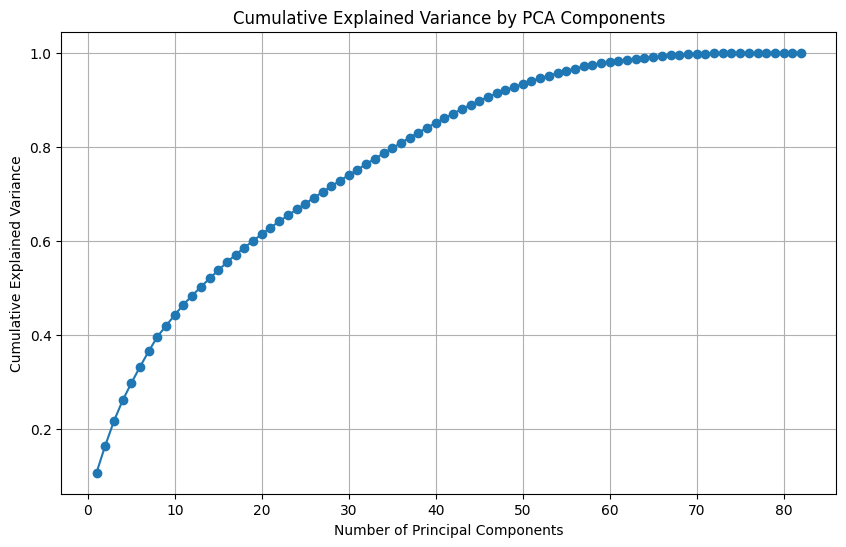

In [9]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_df)

#PCA fit
pca = PCA()
pca_components = pca.fit_transform(scaled_data)

#explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
         pca.explained_variance_ratio_.cumsum(), marker='o')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

In [10]:
explained_variance_df = pd.DataFrame({
    'PCA Component': [f'PC{i+1}' for i in range(len(pca.explained_variance_ratio_))],
    'Explained Variance Ratio': [f'{x:.2f}%' for x in pca.explained_variance_ratio_ * 100],
    'Cumulative Explained Variance': [f'{x:.2f}%' for x in pca.explained_variance_ratio_.cumsum() * 100]
})

# Display the table
explained_variance_df.head(20)
#explained_variance_df.to_csv('cummulative_df.csv')

,PCA Component,Explained Variance Ratio,Cumulative Explained Variance
0,PC1,10.70%,10.70%
1,PC2,5.75%,16.45%
2,PC3,5.21%,21.66%
3,PC4,4.40%,26.06%
4,PC5,3.68%,29.74%
5,PC6,3.48%,33.22%
6,PC7,3.30%,36.52%
7,PC8,3.10%,39.62%
8,PC9,2.34%,41.97%
9,PC10,2.27%,44.23%


##### You notice that the first 18 components explain about 60% and the first 12 explain about 50% of the variation  in the data that we are having 


##### Checking what variables contribute the most to PC1 since it has 12% of the variation in the data 

In [11]:
### Checking to see the PC1 loading to see what variables (independent) contribute the most to ir 

loadings = pca.components_[0]
feature_names = numerical_df.columns

#DataFrame to easily view and sort the loadings
loadings_df = pd.DataFrame({
    'Variable': feature_names,
    'Loading': loadings
})

# Sort the DataFrame by the absolute value of the loadings
top_variables_pc1 = loadings_df.reindex(loadings_df['Loading'].abs().sort_values(ascending=False).index)

# Display the top N variables for PC1
print(top_variables_pc1.head(20))

                                             Variable   Loading
12            Persistent EPS in the Last Four Seasons  0.275671
34              Net profit before tax/Paid-in capital  0.271042
0   ROA(B) before interest and depreciation after tax  0.271029
15           Per Share Net profit before tax (Yuan ¥)  0.268807
74                         Net Income to Total Assets  0.266352
33                   Operating profit/Paid-in capital  0.255483
11                            Net Value Per Share (A)  0.216210
57                  Retained Earnings to Total Assets  0.209979
70                                      CFO to Assets  0.195806
45                    Working Capital to Total Assets  0.179770
13                                Cash Flow Per Share  0.178589
51                       Operating Funds to Liability  0.176459
48                                  Cash/Total Assets  0.165849
8                                      Cash flow rate  0.150952
29                                   Net

##### Looking at this it signifies that based Persistent EPS in the Last Four Seasons , Net profit before tax/Paid-in capital contribute the highest to PC1  . adding to this we have a value Borrowing Dependency in PC1 that shows that even if its not the stongest contributor it still shows that high borrowing dependency can lead to bankruptcy

##### With this we check whether PC1 is more towards a risk of bankruptcy or not and its either 1 or 0 
##### I will use logistic regression since its binary case

### Introduce SMOTE due to class imbalance in the Bankruptcy Column 

In [12]:
df['Bankrupt?'].value_counts()
### it is clear that we have more non bankrupt companies than the bankrupt ones 

Bankrupt?
0    6599
1     220
Name: count, dtype: int64

In [13]:
### Select atleast 10 PCs you can also select 2 or any number you want this is for 
pca_10 = PCA(n_components=20)
pca_components = pca_10.fit_transform(scaled_data)

pca_10_df = pd.DataFrame(data=pca_components, 
                      columns=[f'PC{i+1}' for i in range(20)])

In [14]:
pca_10_df.head(5)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20
0,-6.293806,0.044481,-0.780899,-0.218681,-0.035213,-0.593132,-0.614436,1.259129,0.029254,1.249934,1.135238,0.155342,0.171288,-0.274368,0.900437,-0.510436,-1.073962,-0.650149,-0.153595,0.025266
1,-2.981313,-1.323780,-2.833570,-0.741522,0.449137,0.394161,-0.219952,0.345880,1.328608,-0.103175,0.293494,-0.453799,-0.061950,0.792889,-0.453171,-0.878661,-0.276094,-0.051703,0.212615,-1.289531
2,-3.908623,-0.758740,-0.201251,0.187233,0.283900,0.483650,0.167870,-0.182655,2.308217,0.839223,-0.490599,0.500340,0.077316,1.085701,-1.738537,-0.721249,-2.388871,4.055846,-3.143637,-0.424906
3,-4.852174,-1.392157,-2.011029,-0.350729,0.328301,-0.380671,-0.650988,1.253290,-1.106910,-0.120774,-0.073923,-0.661154,0.418293,0.345629,0.653229,-0.360557,-1.044859,-0.106779,0.209125,0.251425
4,-1.901303,0.083954,0.152393,-1.167192,0.071008,-0.181014,-0.620412,0.802478,-1.394699,0.289974,-1.056179,0.584474,-0.140310,-1.120971,1.255889,-0.438669,-0.911675,0.937178,0.200288,0.159586


In [15]:
# Assuming you have your PCA DataFrame (pca_10_df) and target variable (y)
x = pca_10_df
y = df['Bankrupt?']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
x_resampled, y_resampled = smote.fit_resample(x_train, y_train)

# Check the new class distribution
print("Original training data shape:", x_train.shape)
print("Resampled training data shape:", x_resampled.shape)
print("Original class distribution:", y_train.value_counts())
print("Resampled class distribution:", y_resampled.value_counts())


Original training data shape: (5455, 20)
Resampled training data shape: (10558, 20)
Original class distribution: Bankrupt?
0    5279
1     176
Name: count, dtype: int64
Resampled class distribution: Bankrupt?
0    5279
1    5279
Name: count, dtype: int64


In [ ]:
x_resampled_sm = sm.add_constant(x_resampled)
logit_model = sm.Logit(y_resampled, x_resampled_sm)
result = logit_model.fit(method='lbfgs')  # Change here if need be , leaving () indicates use of heissman matrix
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:              Bankrupt?   No. Observations:                10558
Model:                          Logit   Df Residuals:                    10537
Method:                           MLE   Df Model:                           20
Date:                Sat, 30 Aug 2025   Pseudo R-squ.:                  0.5134
Time:                        16:07:11   Log-Likelihood:                -3560.7
converged:                      False   LL-Null:                       -7318.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.3078      0.064    -36.317      0.000      -2.432      -2.183
PC1           -0.9202      0.028    -32.537      0.000      -0.976      -0.865
PC2            0.6360      0.057     11.157      0.0

c:\Users\wisen\Documents\Machine_Learning_projects\Taiwanese_bankruptcy_Prediction\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


##### it is clear that PC1 has the negative relationship with bankruptcy = 1 . Values that contribute the most to PC1 lead to a reduction in the risk of bankruptcy , however looking at PC3 , since the p value is greater than 0.05 that means the relationship between bankruptcy and PC3 is by chance or random to say

In [17]:
## Checking to see the PC3 loadings

loadings_pc3 = pca.components_[2]
feature_names = numerical_df.columns

#DataFrame to easily view and sort the loadings
loadings_df = pd.DataFrame({
    'Variable': feature_names,
    'Loading': loadings_pc3
})

# Sort the DataFrame by the absolute value of the loadings
top_variables_pc3 = loadings_df.reindex(loadings_df['Loading'].abs().sort_values(ascending=False).index)

# Display the top N variables for PC1
print(top_variables_pc3.head(20))

                                             Variable   Loading
47                        Current Assets/Total Assets  0.355197
46                          Quick Assets/Total Assets  0.311827
66                     Current Liability to Liability  0.294788
54                      Current Liabilities/Liability  0.294788
45                    Working Capital to Total Assets  0.245441
55                             Working Capital/Equity  0.217370
59                               Total expense/Assets  0.214399
36                               Total Asset Turnover  0.189714
40                    Fixed Assets Turnover Frequency -0.175633
67                      Equity to Long-term Liability -0.170976
48                                  Cash/Total Assets  0.169143
70                                      CFO to Assets -0.166879
0   ROA(B) before interest and depreciation after tax -0.143589
13                                Cash Flow Per Share -0.142331
31                               Borrowi

###### Since its PC5 is insignificant based on p value , the variables like Current Assets/Total Assets might not be significant towards determing bankruptcy although they do contribute to PC5 . This also means that these variables are not strong independent predictors of bankruptcy

###### you can see that ROA(B) before interest and depreciation after tax has a very low contribution in PC3 which is insignificant as a PC towards bankruptcy determination but the variable is a high contributor to PC1 which is significant in determining the bankruptcy 

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

# Define models and their hyperparameter grids
model_params = {
    'Logistic Regression': {
        'model': LogisticRegression(random_state=42, max_iter=1000),
        'params': {
            'C': [0.01, 0.1, 1, 10]
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(random_state=42),
        'params': {
            'n_estimators': [100, 200],
            'max_depth': [5, 10, None]
        }
    },
    'SVM': {
        'model': SVC(probability=True, random_state=42),
        'params': {
            'C': [0.1, 1, 10],
            'kernel': ['rbf', 'linear']
        }
    },
    'Naive Bayes': {
        'model': GaussianNB(),
        'params': {
            # No hyperparameters to tune for basic GaussianNB
        }
    },
    'XGBoost': {
        'model': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
        'params': {
            'n_estimators': [100, 200],
            'max_depth': [3, 6],
            'learning_rate': [0.01, 0.1]
        }
    },
    'Neural Network': {
        'model': MLPClassifier(random_state=42, max_iter=500),
        'params': {
            'hidden_layer_sizes': [(50,), (100,), (100, 50)],
            'activation': ['relu', 'tanh'],
            'alpha': [0.0001, 0.001]
        }
    }
}

# Loop over models and perform GridSearchCV
for name, mp in model_params.items():
    print(f"--- {name} ---")

    grid = GridSearchCV(mp['model'], mp['params'], cv=3, scoring='f1', n_jobs=-1)
    grid.fit(x_resampled, y_resampled)

    best_model = grid.best_estimator_
    predictions = best_model.predict(x_test)

    print("Best Params:", grid.best_params_)
    print(classification_report(y_test, predictions))
    print("\n" + "="*60 + "\n")


--- Logistic Regression ---
Best Params: {'C': 0.1}
              precision    recall  f1-score   support

           0       0.99      0.87      0.93      1320
           1       0.18      0.86      0.30        44

    accuracy                           0.87      1364
   macro avg       0.59      0.87      0.62      1364
weighted avg       0.97      0.87      0.91      1364



--- Random Forest ---
Best Params: {'max_depth': None, 'n_estimators': 200}
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1320
           1       0.33      0.48      0.39        44

    accuracy                           0.95      1364
   macro avg       0.66      0.72      0.68      1364
weighted avg       0.96      0.95      0.96      1364



--- SVM ---
Best Params: {'C': 10, 'kernel': 'rbf'}
              precision    recall  f1-score   support

           0       0.99      0.89      0.94      1320
           1       0.17      0.66      0.27        44

c:\Users\wisen\Documents\Machine_Learning_projects\Taiwanese_bankruptcy_Prediction\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:11:29] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Params: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200}
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1320
           1       0.32      0.55      0.40        44

    accuracy                           0.95      1364
   macro avg       0.65      0.75      0.69      1364
weighted avg       0.96      0.95      0.95      1364



--- Neural Network ---
Best Params: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (100, 50)}
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1320
           1       0.38      0.34      0.36        44

    accuracy                           0.96      1364
   macro avg       0.68      0.66      0.67      1364
weighted avg       0.96      0.96      0.96      1364



